In [1]:
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random

import tensorflow as tf

import PIL
from PIL import Image
import shutil

Using TensorFlow backend.


In [26]:
# collect data - filling an array with images using a loop

data = []
for filename in os.listdir('../images/Images_version_4/Train2/'):
    data.append(img_to_array(load_img('../images/Images_version_4/Train2/'+filename)))
    print(filename)

# convert image array to float array of images
data = np.array(data, dtype=float)

# Set up train data - consider RGB value 255
Xtrain = data
Xtrain = 1.0/255*Xtrain

img_0.jpg
img_1.jpg
img_10.jpg
img_100.jpg
img_1000.jpg
img_1001.jpg
img_1002.jpg
img_1003.jpg
img_1004.jpg
img_1005.jpg
img_1006.jpg
img_1007.jpg
img_1008.jpg
img_1009.jpg
img_101.jpg
img_1010.jpg
img_1011.jpg
img_1012.jpg
img_1013.jpg
img_1014.jpg
img_1015.jpg
img_1016.jpg
img_1017.jpg
img_1018.jpg
img_1019.jpg
img_102.jpg
img_1020.jpg
img_1021.jpg
img_1022.jpg
img_1023.jpg
img_1024.jpg
img_1025.jpg
img_1026.jpg
img_1027.jpg
img_1028.jpg
img_1029.jpg
img_103.jpg
img_1030.jpg
img_1031.jpg
img_1032.jpg
img_1033.jpg
img_1034.jpg
img_1035.jpg
img_1036.jpg
img_1037.jpg
img_1038.jpg
img_1039.jpg
img_104.jpg
img_1040.jpg
img_1041.jpg
img_1042.jpg
img_1043.jpg
img_1044.jpg
img_1045.jpg
img_1046.jpg
img_1047.jpg
img_1048.jpg
img_1049.jpg
img_105.jpg
img_1050.jpg
img_1051.jpg
img_1052.jpg
img_1053.jpg
img_1054.jpg
img_1055.jpg
img_1056.jpg
img_1057.jpg
img_1058.jpg
img_1059.jpg
img_106.jpg
img_1060.jpg
img_1061.jpg
img_1062.jpg
img_1063.jpg
img_1064.jpg
img_1065.jpg
img_1066.jpg
img_1067.jpg
i

img_1606.jpg
img_1607.jpg
img_1608.jpg
img_1609.jpg
img_161.jpg
img_1610.jpg
img_1611.jpg
img_1612.jpg
img_1613.jpg
img_1614.jpg
img_1615.jpg
img_1616.jpg
img_1617.jpg
img_1618.jpg
img_1619.jpg
img_162.jpg
img_1620.jpg
img_1621.jpg
img_1622.jpg
img_1623.jpg
img_1624.jpg
img_1625.jpg
img_1626.jpg
img_1627.jpg
img_1628.jpg
img_1629.jpg
img_163.jpg
img_1630.jpg
img_1631.jpg
img_1632.jpg
img_1633.jpg
img_1634.jpg
img_1635.jpg
img_1636.jpg
img_1637.jpg
img_1638.jpg
img_1639.jpg
img_164.jpg
img_1640.jpg
img_1641.jpg
img_1642.jpg
img_1643.jpg
img_1644.jpg
img_1645.jpg
img_1646.jpg
img_1647.jpg
img_1648.jpg
img_1649.jpg
img_165.jpg
img_1650.jpg
img_1651.jpg
img_1652.jpg
img_1653.jpg
img_1654.jpg
img_1655.jpg
img_1656.jpg
img_1657.jpg
img_1658.jpg
img_1659.jpg
img_166.jpg
img_1660.jpg
img_1661.jpg
img_1662.jpg
img_1663.jpg
img_1664.jpg
img_1665.jpg
img_1666.jpg
img_1667.jpg
img_1668.jpg
img_1669.jpg
img_167.jpg
img_1670.jpg
img_1671.jpg
img_1672.jpg
img_1673.jpg
img_1674.jpg
img_1675.jpg
img_16

img_2204.jpg
img_2205.jpg
img_2206.jpg
img_2207.jpg
img_2208.jpg
img_2209.jpg
img_221.jpg
img_2210.jpg
img_2211.jpg
img_2212.jpg
img_2213.jpg
img_2214.jpg
img_2215.jpg
img_2216.jpg
img_2217.jpg
img_2218.jpg
img_2219.jpg
img_222.jpg
img_2220.jpg
img_2221.jpg
img_2222.jpg
img_2223.jpg
img_2224.jpg
img_2225.jpg
img_2226.jpg
img_2227.jpg
img_2228.jpg
img_2229.jpg
img_223.jpg
img_2230.jpg
img_2231.jpg
img_2232.jpg
img_2233.jpg
img_2234.jpg
img_2235.jpg
img_2236.jpg
img_2237.jpg
img_2238.jpg
img_2239.jpg
img_224.jpg
img_2240.jpg
img_2241.jpg
img_2242.jpg
img_2243.jpg
img_2244.jpg
img_2245.jpg
img_2246.jpg
img_2247.jpg
img_2248.jpg
img_2249.jpg
img_225.jpg
img_2250.jpg
img_2251.jpg
img_2252.jpg
img_2253.jpg
img_2254.jpg
img_2255.jpg
img_2256.jpg
img_2257.jpg
img_2258.jpg
img_2259.jpg
img_226.jpg
img_2260.jpg
img_2261.jpg
img_2262.jpg
img_2263.jpg
img_2264.jpg
img_2265.jpg
img_2266.jpg
img_2267.jpg
img_2268.jpg
img_2269.jpg
img_227.jpg
img_2270.jpg
img_2271.jpg
img_2272.jpg
img_2273.jpg
img_22

img_656.jpg
img_657.jpg
img_658.jpg
img_659.jpg
img_66.jpg
img_660.jpg
img_661.jpg
img_662.jpg
img_663.jpg
img_664.jpg
img_665.jpg
img_666.jpg
img_667.jpg
img_668.jpg
img_669.jpg
img_67.jpg
img_670.jpg
img_671.jpg
img_672.jpg
img_673.jpg
img_674.jpg
img_675.jpg
img_676.jpg
img_677.jpg
img_678.jpg
img_679.jpg
img_68.jpg
img_680.jpg
img_681.jpg
img_682.jpg
img_683.jpg
img_684.jpg
img_685.jpg
img_686.jpg
img_687.jpg
img_688.jpg
img_689.jpg
img_69.jpg
img_690.jpg
img_691.jpg
img_692.jpg
img_693.jpg
img_694.jpg
img_695.jpg
img_696.jpg
img_697.jpg
img_698.jpg
img_699.jpg
img_7.jpg
img_70.jpg
img_700.jpg
img_701.jpg
img_702.jpg
img_703.jpg
img_704.jpg
img_705.jpg
img_706.jpg
img_707.jpg
img_708.jpg
img_709.jpg
img_71.jpg
img_710.jpg
img_711.jpg
img_712.jpg
img_713.jpg
img_714.jpg
img_715.jpg
img_716.jpg
img_717.jpg
img_718.jpg
img_719.jpg
img_72.jpg
img_720.jpg
img_721.jpg
img_722.jpg
img_723.jpg
img_724.jpg
img_725.jpg
img_726.jpg
img_727.jpg
img_728.jpg
img_729.jpg
img_73.jpg
img_730.jpg
im

In [27]:
model = Sequential()
# define an input layer (only once) - input data have shape of 256x256
# be aware that convolutional takes a 3D input so we need to shape to 256x256 and 1 for 1 color space
# specifing input shape sets also the weight for our model

# 1st filter, 2st kernel space (3,3) <-- size of filter
# activation relu -- good for deep learning (tangente)
# padding - output from kernel will decrease - padding does that it will fill up cells with 0's
model.add(Conv2D(8, (3, 3), activation='relu', padding='same',  strides=2, input_shape=(256, 256, 1)))
# strides -> nr or tuple - how much kernel should be moved (2 px)
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

model.compile(optimizer='rmsprop', loss='mse' , metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 128)      

In [30]:
# Setup ImageDataGenerator
# How does it work?
#    1) accepting batch of images
#    2) apply random transformation to each image
#    3) replace original batch we newly transformed batch
#    4) train CNN on newly transformed batch

dataGenerator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2
)

# define batch size
batch_size = 32

# define function to call ImagedataGenerator
def imageGenerator(batch_size):
    for batch in dataGenerator.flow(Xtrain, batch_size=batch_size):
        # be aware that we have rgb colored photos, to work better we 
        # call rgb2lab function which converts image to a lab image with a b color channel
        # # Lab color, L -> grayscale layer, a b -> color layers (green-red, blue-yellow)
        lab_of_batch = rgb2lab(batch)
        # extract b/w layer for Xbatch
        Xbatch = lab_of_batch[:,:,:,0] # [:,:,:,0] -> select grayscale layer
        # extract two color layer for Ybatch
        # ab spectrum [-128,128] .. divide by 128 to get [-1,1]
        Ybatch = lab_of_batch[:,:,:,1:]/128 # [:,:,:,1] -> select color layer
        # return generator object
        yield(Xbatch.reshape(Xbatch.shape+(1,)), Ybatch)

# Train
filepath = "model_1709.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# keras support 3 types of training
#   1.fit, 2. fit_generator, 3. train_on_batch

# to train on large models .fit would not be suitable because RAM overfilled

# .fit_generator - here data is no longer “static” — the data is constantly changing
# Each new batch of data is randomly adjusted according to the parameters supplied to ImageDataGenerator
# .fit_generator accepts the batch of data, performs backpropagation, and updates the weights in our model

# .train_on_batch -- fine-grained control over training your deep learning models - mostly not suitable

history = model.fit_generator(imageGenerator(batch_size), epochs=10, steps_per_epoch=100, verbose=1, callbacks=callbacks_list)

Epoch 1/10
100/100 [==============================] - 1203s 12s/step - loss: 0.0290 - accuracy: 0.6495
Epoch 2/10
100/100 [==============================] - 1400s 14s/step - loss: 0.0251 - accuracy: 0.6631
Epoch 3/10
100/100 [==============================] - 1342s 13s/step - loss: 0.0246 - accuracy: 0.6605
Epoch 4/10
100/100 [==============================] - 1216s 12s/step - loss: 0.0244 - accuracy: 0.6581
Epoch 5/10
100/100 [==============================] - 1347s 13s/step - loss: 0.0247 - accuracy: 0.6632
Epoch 6/10
100/100 [==============================] - 1329s 13s/step - loss: 0.0242 - accuracy: 0.6566
Epoch 7/10
100/100 [==============================] - 1406s 14s/step - loss: 0.0239 - accuracy: 0.6648
Epoch 8/10
100/100 [==============================] - 1215s 12s/step - loss: 0.0241 - accuracy: 0.6595
Epoch 9/10
100/100 [==============================] - 1195s 12s/step - loss: 0.0238 - accuracy: 0.6578
Epoch 10/10
100/100 [==============================] - 1221s 12s/step - l

dict_keys(['loss', 'accuracy'])


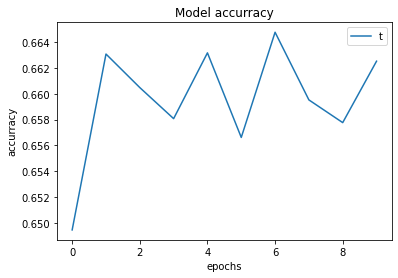

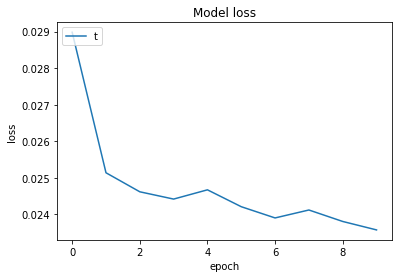

In [31]:
# List all data in history object
print(history.history.keys())

# print accurarcy model with plot
plt.plot(history.history['accuracy'])
plt.title('Model accurracy')
plt.ylabel('accurracy')
plt.xlabel('epochs')
plt.legend('train')
plt.show()

# print history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='upper left')
plt.show()

np.save('history_1709_test.npy', history.history)

In [ ]:
# Save model
model_json = model.to_json()
with open("model_14_09.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_14_09.h5")

In [ ]:
# load json and create model

from keras.models import model_from_json
json_file = open('model_14_09.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_14_09.h5")

In [32]:
# Colorizer section 
images_to_color = []
for filename in os.listdir('../images/Images_version_4/Test/'):
    images_to_color.append(img_to_array(load_img('../images/Images_version_4/Test/'+filename)))

# convert color space, reshape img
images_to_color = np.array(images_to_color, dtype=float)
images_to_color = rgb2lab(1.0/255*images_to_color)[:,:,:,0]
images_to_color = images_to_color.reshape(images_to_color.shape+(1,))

# Test model with predict() function
output = model.predict(images_to_color)

# covert color value back from [-1,1] to [-128,128] which is Lab color spectrum
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))            # make empty 256x256 with 3 layers
    cur[:,:,0] = images_to_color[i][:,:,0]   # copy grayscale layer to new obj
    cur[:,:,1:] = output[i]                  # copy color layer to new obj
    # save img in directory
    imsave("../images/Images_version_4/Result2/img_"+str(i)+".png", lab2rgb(cur))


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0